# CF Project 6.3: Geographic Visualization

## This script contains the following:
### 01. Import data and libraries
### 02. Further Data Wrangling and Cleaning
### 03. Plotting a Choropleth
### 04. Saving and Exporting files
### Appendix

# 01. Import libraries and files

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [3]:
# Import JSONfile
country_geo = r'C:\Users\olufunsoo\Downloads\us-states json file.json'

In [4]:
# Checking output
country_geo

'C:\\Users\\olufunsoo\\Downloads\\us-states json file.json'

In [5]:
# For matplotlib visuals to appear in the notebook without 'calling' for it
%matplotlib inline

In [6]:
# Create path
path = r'C:\Users\olufunsoo\Documents\CFProject'

In [7]:
# Import data file as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated1.csv'), index_col = False)

In [8]:
# Check output
df.head()

,Unnamed: 0.1,Unnamed: 0,Federal Provider Number,Provider Name,Provider State,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Provider Resides in Hospital,...,Cycle 3 Number of Health Revisits,Cycle 3 Health Revisit Score,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties,Processing Date,Nursing Home Age,Health Survey Score category
0,0,0,15019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,AL,For profit - Corporation,124,102,Medicare and Medicaid,False,...,1.0,0.0,24.0,22.667,0,1,1,2016-09-01,15584 days,Good Score
1,1,1,15113,RIVER CITY CENTER,AL,For profit - Corporation,183,168,Medicare and Medicaid,False,...,1.0,0.0,40.0,48.667,0,3,1,2016-09-01,17130 days,Good Score
2,2,2,15112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,AL,For profit - Corporation,77,77,Medicare and Medicaid,False,...,1.0,0.0,16.0,15.333,0,0,0,2016-09-01,14976 days,Good Score
3,3,3,15114,SHADESCREST HEALTH CARE CENTER,AL,For profit - Corporation,107,96,Medicare and Medicaid,False,...,1.0,0.0,52.0,25.333,0,3,1,2016-09-01,16683 days,Good Score
4,4,4,15123,WASHINGTON COUNTY NURSING HOME,AL,Government - County,88,81,Medicare and Medicaid,True,...,1.0,0.0,20.0,13.333,0,0,0,2016-09-01,15219 days,Good Score


# 02. Further Data Wrangling and Cleaning

### Dropping Columns

In [9]:
# Dropping more unnecessary columns
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'With a Resident and Family Council', 'Cycle 1 Standard Survey Health Date', 'Cycle 2 Standard Health Survey Date', 'Cycle 3 Standard Health Survey Date'])

In [10]:
df.shape

(15050, 46)

### Deriving New Column 'STATE' from 'Provider State'

In [11]:
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [12]:
df['STATE'] = df['Provider State'].map(state_dict)

In [13]:
df['STATE']

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
15045      Texas
15046      Texas
15047      Texas
15048      Texas
15049      Texas
Name: STATE, Length: 15050, dtype: object

### Consistency Checks

##### Missing values checks

In [14]:
# Check for missing values

df.isnull().sum()

Federal Provider Number                                             0
Provider Name                                                       0
Provider State                                                      0
Ownership Type                                                      0
Number of Certified Beds                                            0
Number of Residents in Certified Beds                               0
Provider Type                                                       0
Provider Resides in Hospital                                        0
Date First Approved to Provide Medicare and Medicaid services       0
Continuing Care Retirement Community                                0
Special Focus Facility                                              0
Provider Changed Ownership in Last 12 Months                        0
Automatic Sprinkler Systems in All Required Areas                   0
Overall Rating                                                      0
Health Inspection Ra

In [15]:
df_nan = df[df['STATE'].isnull() == True]

In [16]:
df_nan

,Federal Provider Number,Provider Name,Provider State,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid services,Continuing Care Retirement Community,...,Cycle 3 Health Revisit Score,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties,Processing Date,Nursing Home Age,Health Survey Score category,STATE
71,95039,UNITED MEDICAL NURSING HOME,DC,Government - City/county,120,117,Medicare and Medicaid,True,2009-02-27,False,...,128.0,383.0,189.833,6,1,4,2016-09-01,2743 days,Middle Score,NaN
730,405018,RYDER MEMORIAL HOSPITAL INC,PR,Non profit - Corporation,62,20,Medicare,True,1979-04-01,False,...,0.0,692.0,364.667,0,0,2,2016-09-01,13668 days,Bad Score,NaN
2559,95034,CARROLL MANOR NURSING & REHAB,DC,Non profit - Corporation,252,241,Medicare and Medicaid,True,1996-03-20,False,...,0.0,20.0,58.667,2,4,1,2016-09-01,7470 days,Good Score,NaN
2560,95038,FOREST HILLS OF DC,DC,Non profit - Corporation,50,49,Medicare and Medicaid,False,2000-12-27,False,...,0.0,28.0,74.000,0,0,0,2016-09-01,5727 days,Good Score,NaN
2561,95031,BRINTON WOODS HEALTH & REHAB CENTER AT DUPONT ...,DC,For profit - Partnership,180,171,Medicare and Medicaid,False,1995-03-21,False,...,0.0,76.0,55.333,0,0,0,2016-09-01,7835 days,Good Score,NaN
2562,95030,SIBLEY MEM HOSP RENAISSANCE,DC,For profit - Corporation,45,40,Medicare and Medicaid,True,1994-05-27,False,...,0.0,24.0,44.000,0,0,0,2016-09-01,8133 days,Good Score,NaN
2563,9.00E+20,JEANNE JUGAN RESIDENCE,DC,Non profit - Corporation,40,39,Medicaid,False,1983-02-25,False,...,0.0,20.0,29.333,1,0,0,2016-09-01,12242 days,Good Score,NaN
2565,95036,UNIQUE RESIDENTIAL CARE CENTER,DC,For profit - Corporation,230,217,Medicare and Medicaid,False,1997-07-01,False,...,0.0,20.0,81.333,0,4,0,2016-09-01,7002 days,Good Score,NaN
2607,95025,LISNER LOUISE DICKSON HURTHOME,DC,Non profit - Corporation,60,58,Medicare and Medicaid,False,1992-11-12,False,...,0.0,60.0,32.000,0,0,0,2016-09-01,8694 days,Good Score,NaN
2608,95027,BRIDGEPOINT SUB-ACUTE AND REHAB CAPITOL HILL,DC,For profit - Corporation,117,114,Medicare and Medicaid,True,1992-12-17,False,...,247.0,600.0,381.667,1,1,1,2016-09-01,8659 days,Bad Score,NaN


In [17]:
# Updating 'state_dict'
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [18]:
df['STATE'] = df['Provider State'].map(state_dict)

In [19]:
# Dropping column 'Health Survey Score category'
df = df.drop(columns = ['Health Survey Score category'])

In [20]:
# Checking output
df.isnull().sum()

Federal Provider Number                                            0
Provider Name                                                      0
Provider State                                                     0
Ownership Type                                                     0
Number of Certified Beds                                           0
Number of Residents in Certified Beds                              0
Provider Type                                                      0
Provider Resides in Hospital                                       0
Date First Approved to Provide Medicare and Medicaid services      0
Continuing Care Retirement Community                               0
Special Focus Facility                                             0
Provider Changed Ownership in Last 12 Months                       0
Automatic Sprinkler Systems in All Required Areas                  0
Overall Rating                                                     0
Health Inspection Rating          

In [21]:
# Creating subset for the variables necessary for the Geospatial analysis
df_geo = df[['Federal Provider Number', 'STATE', 'Number of Certified Beds', 'Number of Residents in Certified Beds', 'Overall Rating', 'Staffing Rating']]

In [22]:
df_geo

,Federal Provider Number,STATE,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Staffing Rating
0,15019,Alabama,124,102,4.0,4.0
1,15113,Alabama,183,168,1.0,3.0
2,15112,Alabama,77,77,5.0,4.0
3,15114,Alabama,107,96,4.0,5.0
4,15123,Alabama,88,81,4.0,4.0
...,...,...,...,...,...,...
15045,676321,Texas,120,110,1.0,1.0
15046,676344,Texas,90,37,1.0,2.0
15047,676361,Texas,80,64,1.0,1.0
15048,676362,Texas,103,103,2.0,2.0


##### Extreme values checks

<Axes: xlabel='Number of Certified Beds', ylabel='Count'>

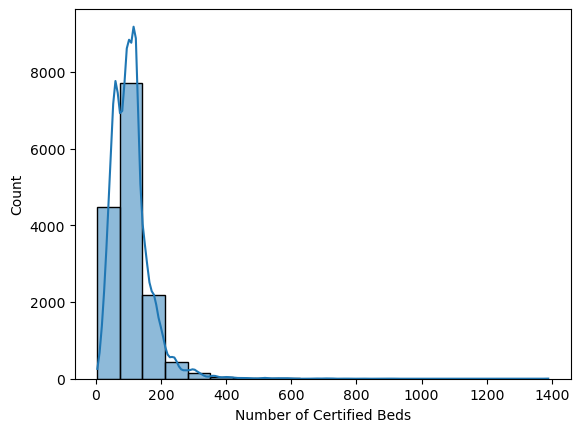

In [23]:
# Checking for extreme value in 'Number of Certified Beds'
sns.histplot(df_geo['Number of Certified Beds'], bins=20, kde = True)

In [24]:
# Check how many extreme values

df_geo[df_geo['Number of Certified Beds'] > 800] # Google research shows the highest number of certified beds in 2022 was 874 beds

,Federal Provider Number,STATE,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Staffing Rating
718,395780,Pennsylvania,908,747,1.0,4.0
7656,335462,New York,816,725,5.0,1.0
8818,335092,New York,1389,159,5.0,5.0


##### These records will be left as there is the possibility of nursing homes have these values of certified beds

<Axes: xlabel='Overall Rating', ylabel='Count'>

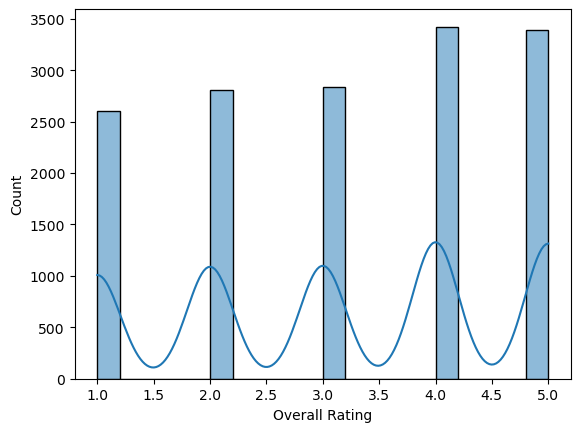

In [25]:
# Check the rating variables

sns.histplot(df_geo['Overall Rating'], bins=20, kde = True)

<Axes: xlabel='Staffing Rating', ylabel='Count'>

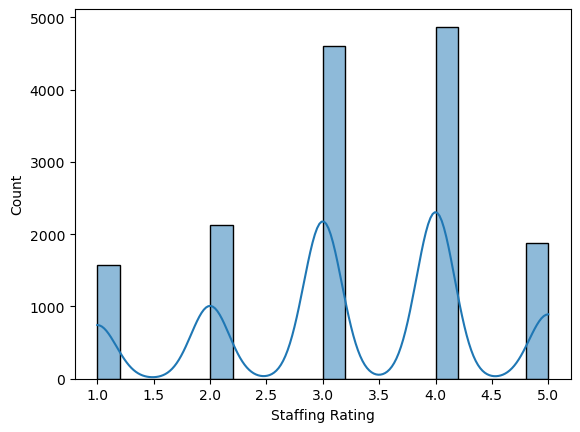

In [26]:
sns.histplot(df_geo['Staffing Rating'], bins=20, kde = True)

# 03. Plotting a Choropleth

In [27]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_geo[['STATE','Overall Rating']]
data_to_plot.head()

,STATE,Overall Rating
0,Alabama,4.0
1,Alabama,1.0
2,Alabama,5.0
3,Alabama,4.0
4,Alabama,4.0


In [32]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE', 'Overall Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

map

# 04. Saving and Exporting files

In [33]:
# Save map
map.save('plot_data.html')

In [34]:
# Exporting df as 'Project_Data_Updated_0311.csv'
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated_0311.csv'))

## Appendix
#### Majority of the states in the US have nursing homes with good overall ratings with scores between 3.0 and 5.0. 7 states are shown to have nursing homes with poor overall ratings.
#### This analysis answers the question "2.	Which states have nursing homes with good ratings? (and vice versa)."
#### The states with the lowest overall rating seem to be big state. So it leads to the question "Does the size of a state have any impact on the the overall rating of a nursing home? Is there a relationship between the size of a state and the rating of the nursing homes in the respective state?